In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

    
# Loop through all the cities in the list.
record_count = 1
set_count = 1
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | wyndham
Processing Record 4 of Set 1 | weligama
Processing Record 5 of Set 1 | cabedelo
Processing Record 6 of Set 1 | barnstaple
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | banda aceh
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | mabamba
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | ifo
Processing Record 17 of Set 1 | puerto escondido
Processing Record 18 of Set 1 | esna
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | valleyview
Processing Record 22 of Set 1 | pevek
Processing Record 23 of Set 1 | ushuaia
Processi

City not found. Skipping...
Processing Record 34 of Set 4 | pisco
Processing Record 35 of Set 4 | kudahuvadhoo
Processing Record 36 of Set 4 | praia da vitoria
Processing Record 37 of Set 4 | port lincoln
Processing Record 38 of Set 4 | barinas
Processing Record 39 of Set 4 | ilulissat
Processing Record 40 of Set 4 | hasaki
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | tombouctou
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | mudyuga
City not found. Skipping...
Processing Record 45 of Set 4 | qena
Processing Record 46 of Set 4 | dakoro
Processing Record 47 of Set 4 | mus
Processing Record 48 of Set 4 | bara
Processing Record 49 of Set 4 | nizwa
Processing Record 50 of Set 4 | musoma
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | dicabisagan
Processing Record 3 of Set 5 | bonavista
Processing Record 4 of Set 5 | oksfjord
Processing Record 5 of Set 5 | farafangana
Processing Record 6 of Set 5 | kupang
Proc

Processing Record 25 of Set 8 | liverpool
Processing Record 26 of Set 8 | namatanai
Processing Record 27 of Set 8 | agirish
Processing Record 28 of Set 8 | oussouye
Processing Record 29 of Set 8 | sembe
Processing Record 30 of Set 8 | northam
Processing Record 31 of Set 8 | tecoanapa
Processing Record 32 of Set 8 | bilma
Processing Record 33 of Set 8 | santa cruz del sur
Processing Record 34 of Set 8 | gimli
Processing Record 35 of Set 8 | ascension
Processing Record 36 of Set 8 | yerbogachen
Processing Record 37 of Set 8 | manicore
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | koungou
Processing Record 40 of Set 8 | moth
Processing Record 41 of Set 8 | chumikan
Processing Record 42 of Set 8 | dolny kubin
Processing Record 43 of Set 8 | san jose
Processing Record 44 of Set 8 | lompoc
Processing Record 45 of Set 8 | guntakal
Processing Record 46 of Set 8 | stoyba
City not found. Skipping...
Processing Record 47 of Set 8 | sabang
Processing Record 48 of Set 8 

Processing Record 16 of Set 12 | inuvik
Processing Record 17 of Set 12 | shimoda
Processing Record 18 of Set 12 | hushitai
Processing Record 19 of Set 12 | jaca
Processing Record 20 of Set 12 | labuhan
Processing Record 21 of Set 12 | knin
Processing Record 22 of Set 12 | vittoria
Processing Record 23 of Set 12 | west wendover
Processing Record 24 of Set 12 | villa carlos paz
Processing Record 25 of Set 12 | champerico
Processing Record 26 of Set 12 | maltahohe
Processing Record 27 of Set 12 | luderitz
Processing Record 28 of Set 12 | seoul
Processing Record 29 of Set 12 | bugiri
Processing Record 30 of Set 12 | tigwi
City not found. Skipping...
Processing Record 31 of Set 12 | vammala
Processing Record 32 of Set 12 | bali
Processing Record 33 of Set 12 | hambantota
Processing Record 34 of Set 12 | lodwar
Processing Record 35 of Set 12 | waingapu
Processing Record 36 of Set 12 | umm kaddadah
Processing Record 37 of Set 12 | alyangula
Processing Record 38 of Set 12 | sangar
Processing R

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2021-10-24 18:48:31,71.9667,102.5000,0.57,90,84,16.51
1,Bluff,NZ,2021-10-24 18:48:28,-46.6000,168.3333,52.61,94,100,4.74
2,Wyndham,US,2021-10-24 18:49:26,37.6985,-77.6125,76.80,55,1,5.01
3,Weligama,LK,2021-10-24 18:49:26,5.9667,80.4167,78.06,85,95,8.34
4,Cabedelo,BR,2021-10-24 18:49:27,-6.9811,-34.8339,86.67,65,97,12.24
5,Barnstaple,GB,2021-10-24 18:49:27,51.0802,-4.0581,58.68,91,96,11.72
6,Vaini,TO,2021-10-24 18:48:24,-21.2000,-175.2000,69.96,83,20,5.75
7,Kodiak,US,2021-10-24 18:46:45,57.7900,-152.4072,44.11,87,90,3.44
8,Busselton,AU,2021-10-24 18:48:29,-33.6500,115.3333,57.04,86,100,11.34
9,Banda Aceh,ID,2021-10-24 18:49:28,5.5577,95.3222,79.07,81,100,6.87


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Khatanga,RU,2021-10-24 18:48:31,71.9667,102.5000,0.57,90,84,16.51
1,1,Bluff,NZ,2021-10-24 18:48:28,-46.6000,168.3333,52.61,94,100,4.74
2,2,Wyndham,US,2021-10-24 18:49:26,37.6985,-77.6125,76.80,55,1,5.01
3,3,Weligama,LK,2021-10-24 18:49:26,5.9667,80.4167,78.06,85,95,8.34
4,4,Cabedelo,BR,2021-10-24 18:49:27,-6.9811,-34.8339,86.67,65,97,12.24
...,...,...,...,...,...,...,...,...,...,...
562,562,Baykit,RU,2021-10-24 18:48:33,61.6700,96.3700,36.39,83,100,11.79
563,563,Kosh-Agach,RU,2021-10-24 18:53:10,50.0000,88.6667,24.82,59,18,2.82
564,564,Taltal,CL,2021-10-24 18:46:38,-25.4000,-70.4833,63.36,69,24,6.40
565,565,Barra Patuca,HN,2021-10-24 18:53:11,15.8000,-84.2833,85.73,70,97,11.18


In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [10]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1635101594.942093

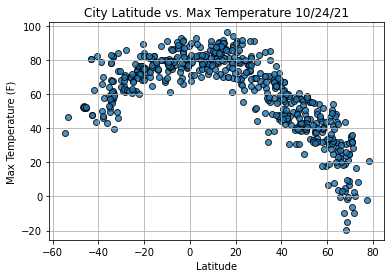

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

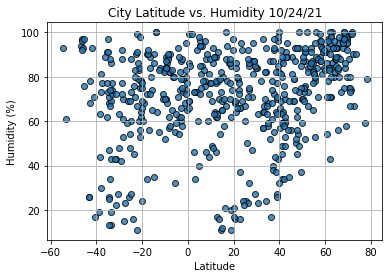

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

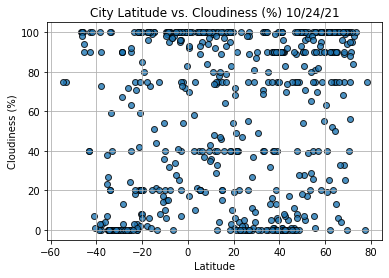

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

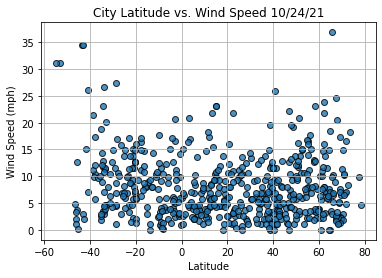

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                       Hobart
Country                        AU
Date          2021-10-24 18:47:31
Lat                      -42.8794
Lng                      147.3294
Max Temp                    48.06
Humidity                       78
Cloudiness                     90
Wind Speed                    3.0
Name: 13, dtype: object

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Khatanga,RU,2021-10-24 18:48:31,71.9667,102.5000,0.57,90,84,16.51
2,2,Wyndham,US,2021-10-24 18:49:26,37.6985,-77.6125,76.80,55,1,5.01
3,3,Weligama,LK,2021-10-24 18:49:26,5.9667,80.4167,78.06,85,95,8.34
5,5,Barnstaple,GB,2021-10-24 18:49:27,51.0802,-4.0581,58.68,91,96,11.72
7,7,Kodiak,US,2021-10-24 18:46:45,57.7900,-152.4072,44.11,87,90,3.44


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

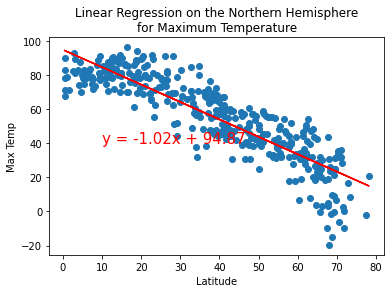

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere'+'\n'+
                       'for Maximum Temperature', 'Max Temp',(10,40))

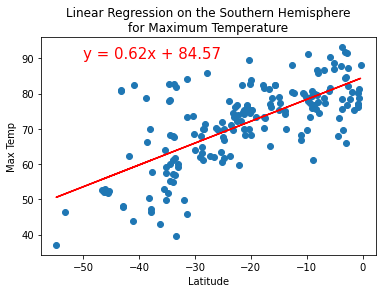

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere'+'\n'+
                        'for Maximum Temperature', 'Max Temp',(-50,90))

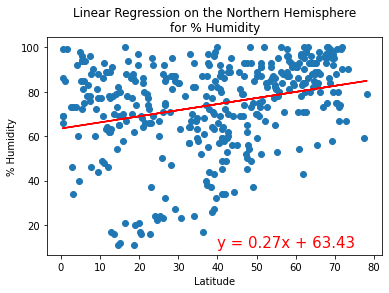

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere'+'\n'
                        'for % Humidity', '% Humidity',(40,10))

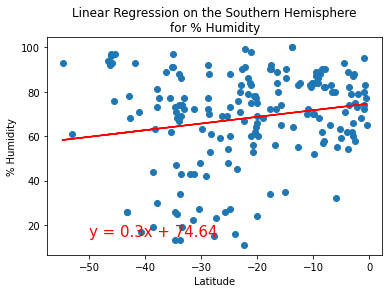

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere'+ '\n'
                        'for % Humidity', '% Humidity',(-50,15))

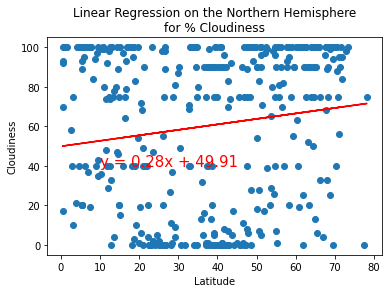

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere'+'\n'
                        'for % Cloudiness', 'Cloudiness',(10,40))

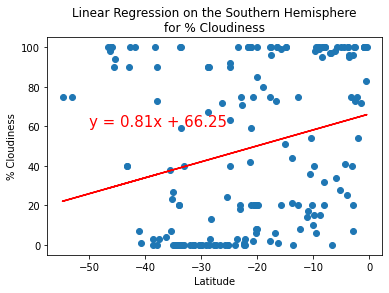

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere'+'\n'+
                        'for % Cloudiness', '% Cloudiness',(-50,60))

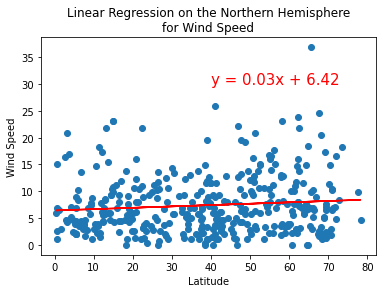

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere'+'\n'+
                        'for Wind Speed', 'Wind Speed',(40,30))

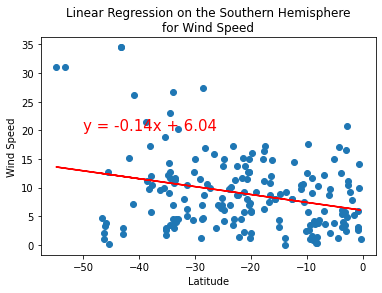

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere'+'\n'+
                        'for Wind Speed', 'Wind Speed',(-50,20))